In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_train_01 = X_train/255.0
X_test_01 = X_test/255.0

# Use Sequantial API to build a MLP

In [26]:
# keras.backend.clear_session()

In [27]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [29]:
w,b =model.layers[1].get_weights()
print(w.shape, b.shape)

(784, 300) (300,)


In [30]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

In [31]:
import os
root_logdir=os.path.join(r'C:\Users\lu.jin01\OneDrive - Cardinal Health\2.Jpt_code',"TB_logs","NMIST")

def get_run_logdir():
    import time
    run_id = time.strftime("%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

logdir = get_run_logdir()
logdir

'C:\\Users\\lu.jin01\\OneDrive - Cardinal Health\\2.Jpt_code\\TB_logs\\NMIST\\2020_03_20-20_16_02'

In [32]:
n_epochs = 100
checkpo_cb = keras.callbacks.ModelCheckpoint('MNIST_model.h5',save_best_only=True)
early_stop_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
tensorboard_cb = keras.callbacks.TensorBoard(logdir)

history = model.fit(X_train_01[:2000],y_train[:2000], epochs=n_epochs, validation_split=0.1,
                   callbacks=[checkpo_cb, early_stop_cb, tensorboard_cb])

Train on 1800 samples, validate on 200 samples
Epoch 1/100
1800/1800 [==============================] - 1s 528us/sample - loss: 2.1511 - accuracy: 0.3017 - val_loss: 1.9365 - val_accuracy: 0.5200
Epoch 2/100
1800/1800 [==============================] - 0s 148us/sample - loss: 1.7359 - accuracy: 0.6661 - val_loss: 1.5106 - val_accuracy: 0.7100
Epoch 3/100
1800/1800 [==============================] - 0s 136us/sample - loss: 1.3328 - accuracy: 0.7744 - val_loss: 1.1496 - val_accuracy: 0.7800
Epoch 4/100
1800/1800 [==============================] - 0s 147us/sample - loss: 1.0260 - accuracy: 0.8167 - val_loss: 0.9006 - val_accuracy: 0.7850
Epoch 5/100
1800/1800 [==============================] - 0s 133us/sample - loss: 0.8237 - accuracy: 0.8372 - val_loss: 0.7320 - val_accuracy: 0.8700
Epoch 6/100
1800/1800 [==============================] - 0s 176us/sample - loss: 0.6925 - accuracy: 0.8528 - val_loss: 0.6308 - val_accuracy: 0.8850
Epoch 7/100
1800/1800 [==============================] - 0s

In [33]:
early_stop_cb.stopped_epoch

93

In [34]:
early_stop_cb.params

{'batch_size': 32,
 'epochs': 100,
 'steps': 57,
 'samples': 1800,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

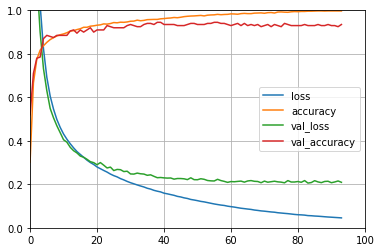

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_xlim(0, n_epochs)
plt.gca().set_ylim(0, 1)
plt.legend(history.history.keys())
plt.show()

In [36]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 1s 78us/sample - loss: 60.6270 - accuracy: 0.8997


[60.62695440641642, 0.8997]

In [37]:
# %load_ext tensorboard
# %tensorboard --logdir='C:\\Users\\lu.jin01\\OneDrive - Cardinal Health\\2.Jpt_code\\TB_logs'

# Wrap the Keras Model into a SKLearn class

In [5]:
def build_model(input_shape=[28,28], n_hid=2, n_neurons=300, output_shape=10, lr=0.0001):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=input_shape))
    for n in range(n_hid):
        model.add(keras.layers.Dense(n_neurons, activation='relu'))
    model.add(keras.layers.Dense(output_shape, activation='softmax'))
    
    optimizer = keras.optimizers.SGD(lr=lr)
    model.compile(metrics=['accuracy'],
                  loss="sparse_categorical_crossentropy", optimizer=optimizer)
    return model

In [6]:
keras_clf = keras.wrappers.scikit_learn.KerasClassifier(build_model)

In [7]:
# use randomCV to find a better hyperParam
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

params_distribs = {'lr':reciprocal(0.01, 1)}
rnd_search_cv = RandomizedSearchCV(keras_clf, params_distribs, n_iter=7, cv=2, random_state=0)

In [9]:
early_stop_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
rnd_search_cv.fit(X_train_01, y_train, epochs=100, validation_split=0.1,
                  callbacks=[early_stop_cb])

Train on 27000 samples, validate on 3000 samples
Epoch 1/100
27000/27000 [==============================] - 5s 187us/sample - loss: 0.3502 - accuracy: 0.8930 - val_loss: 0.1522 - val_accuracy: 0.9550
Epoch 2/100
27000/27000 [==============================] - 4s 139us/sample - loss: 0.1443 - accuracy: 0.9557 - val_loss: 0.0997 - val_accuracy: 0.9730
Epoch 3/100
27000/27000 [==============================] - 3s 110us/sample - loss: 0.0967 - accuracy: 0.9703 - val_loss: 0.1371 - val_accuracy: 0.9607
Epoch 4/100
27000/27000 [==============================] - 3s 111us/sample - loss: 0.0678 - accuracy: 0.9788 - val_loss: 0.0910 - val_accuracy: 0.9763
Epoch 5/100
27000/27000 [==============================] - 3s 119us/sample - loss: 0.0460 - accuracy: 0.9864 - val_loss: 0.0825 - val_accuracy: 0.9777
Epoch 6/100
27000/27000 [==============================] - 4s 135us/sample - loss: 0.0347 - accuracy: 0.9891 - val_loss: 0.0971 - val_accuracy: 0.9750
Epoch 7/100
27000/27000 [====================

RandomizedSearchCV(cv=2, error_score='raise-deprecating',
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x0000024AE77C2C48>,
                   iid='warn', n_iter=7, n_jobs=None,
                   param_distributions={'lr': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000024ADC468588>},
                   pre_dispatch='2*n_jobs', random_state=0, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [11]:
rnd_search_cv.best_params_

{'lr': 0.12296071107325704}

In [12]:
rnd_search_cv.best_score_

0.9743333458900452

In [15]:
from sklearn.metrics import accuracy_score
y_test_hat = rnd_search_cv.predict(X_test_01)
accuracy_score(y_test, y_test_hat)

0.9818

In [20]:
import numpy as np
np.exp(-10000)-1

-1.0